In [1]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "C:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

<>:11: SyntaxWarning: invalid escape sequence '\W'
<>:11: SyntaxWarning: invalid escape sequence '\W'
C:\Users\노준영\AppData\Local\Temp\ipykernel_81092\4001412007.py:11: SyntaxWarning: invalid escape sequence '\W'
  path = "C:\Windows\Fonts\malgun.ttf"


In [2]:
import pandas as pd

In [3]:
care_data = pd.read_csv('./연령별_보육상태별_아동인구.csv', encoding='ANSI')

In [4]:
care_data.head()

,행정구역별(시도),연령별,아동(12세 이하)-계,단일보육상태-계,부모,조부모(친가외가),기타 가족 및 친인척,가사 도우미베이비시터,혼자 또는 다른아동과 지냄,어린이집,유치원,지역아동센터,방과후학교 초등돌봄교실,학원(예체능포함 놀이학교 영어유치원등),기타
0,전국,합계,5197801,3703760,2080207,304779,35413,24729,111834,498001,220054,31516,111997,282275,2955
1,동부,합계,4318375,3081109,1763574,264214,30373,22806,92614,401339,182262,21741,78505,221351,2330
2,읍부,합계,569630,401540,209727,23912,3262,1296,13452,61517,23877,5196,15509,43436,356
3,면부,합계,309796,221111,106906,16653,1778,627,5768,35145,13915,4579,17983,17488,269
4,서울특별시,합계,803123,580864,340493,68087,6072,11116,14640,72662,27530,3349,14310,22096,509


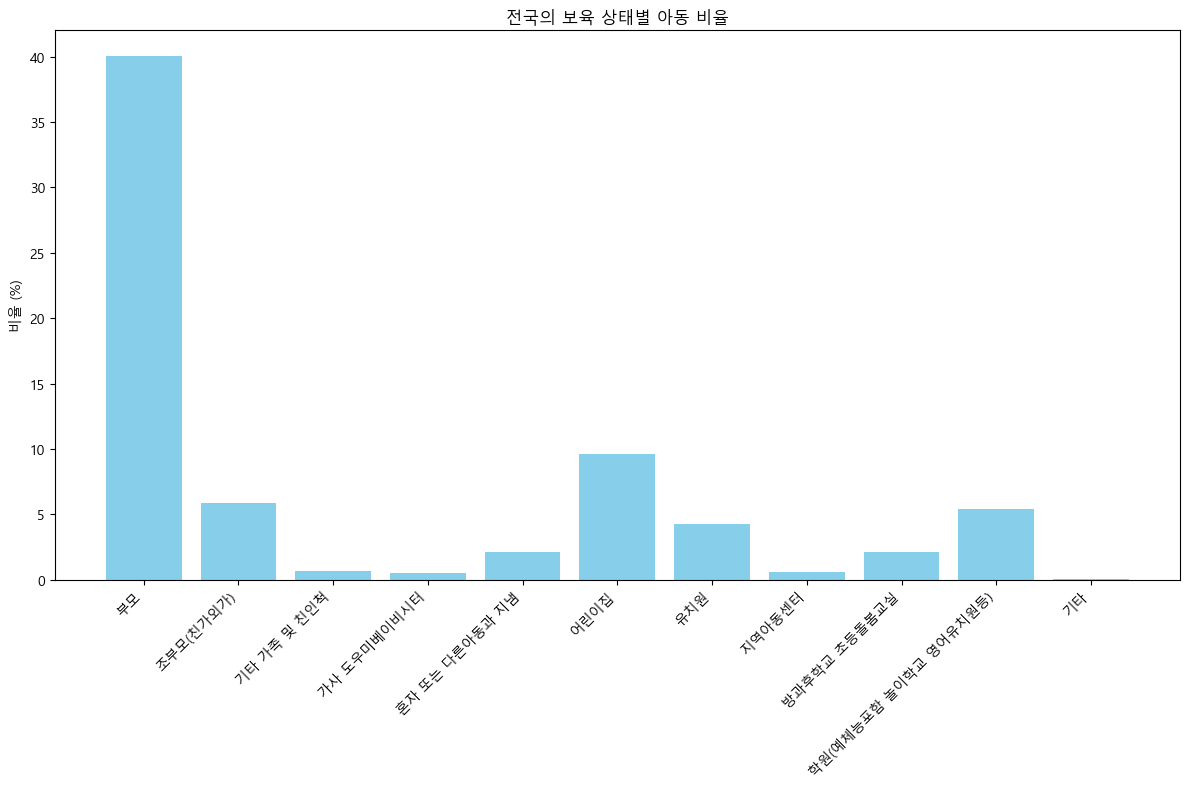

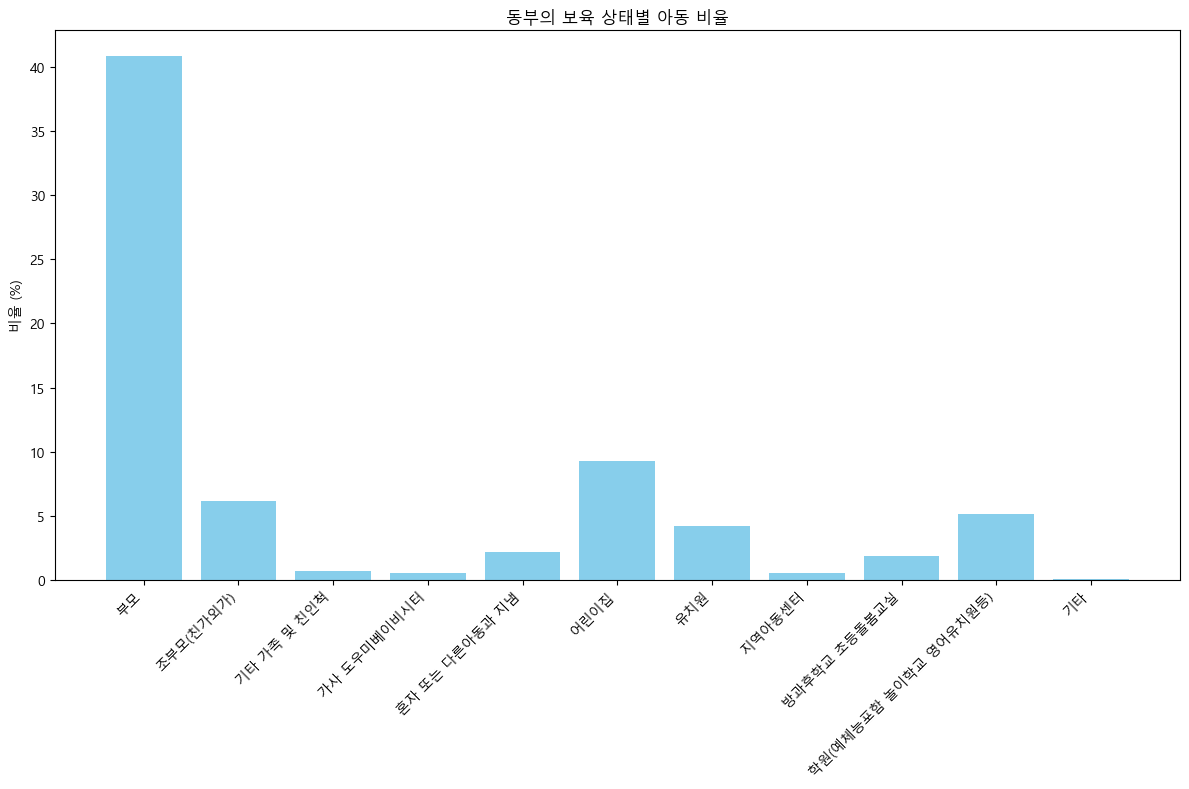

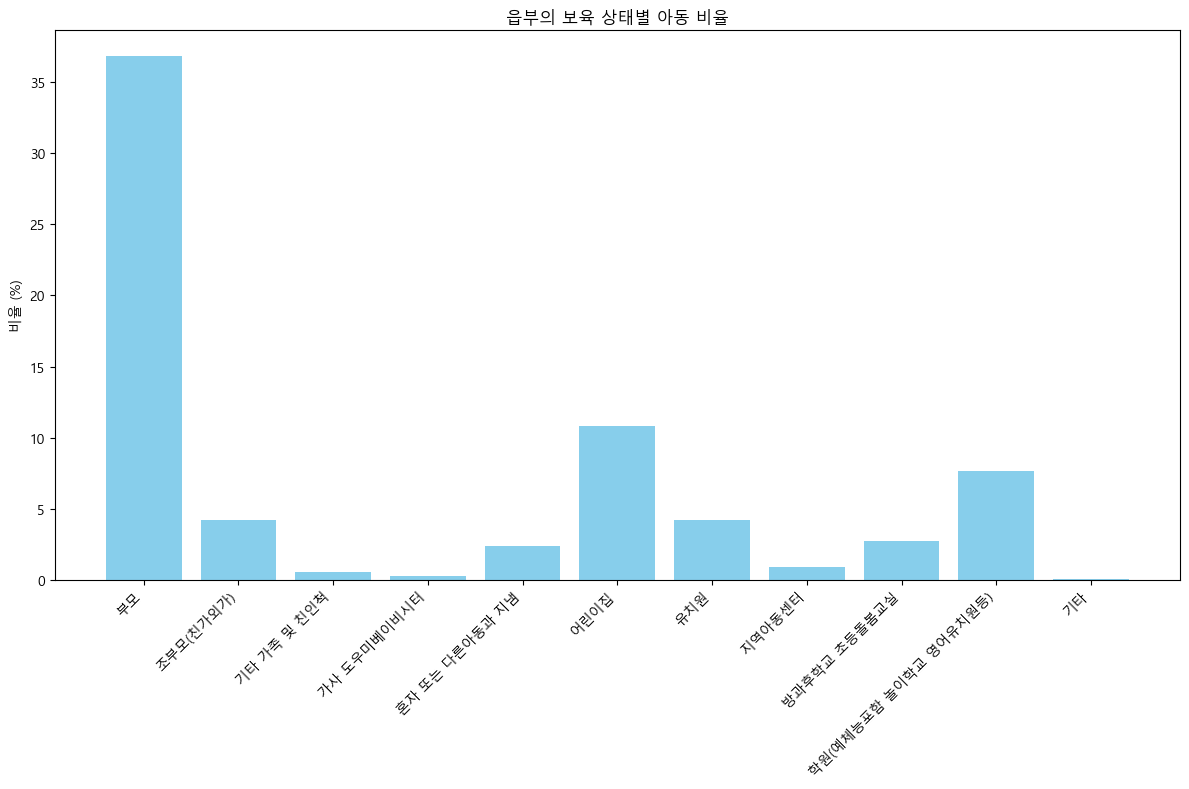

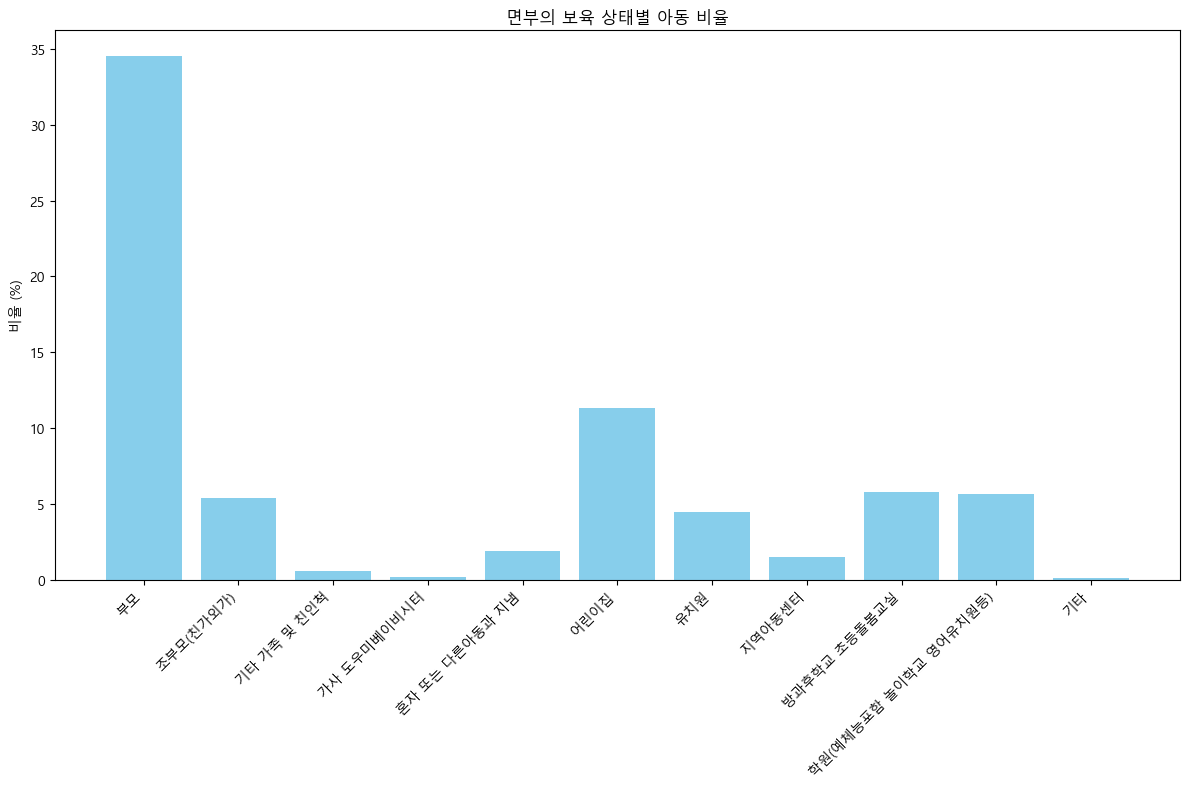

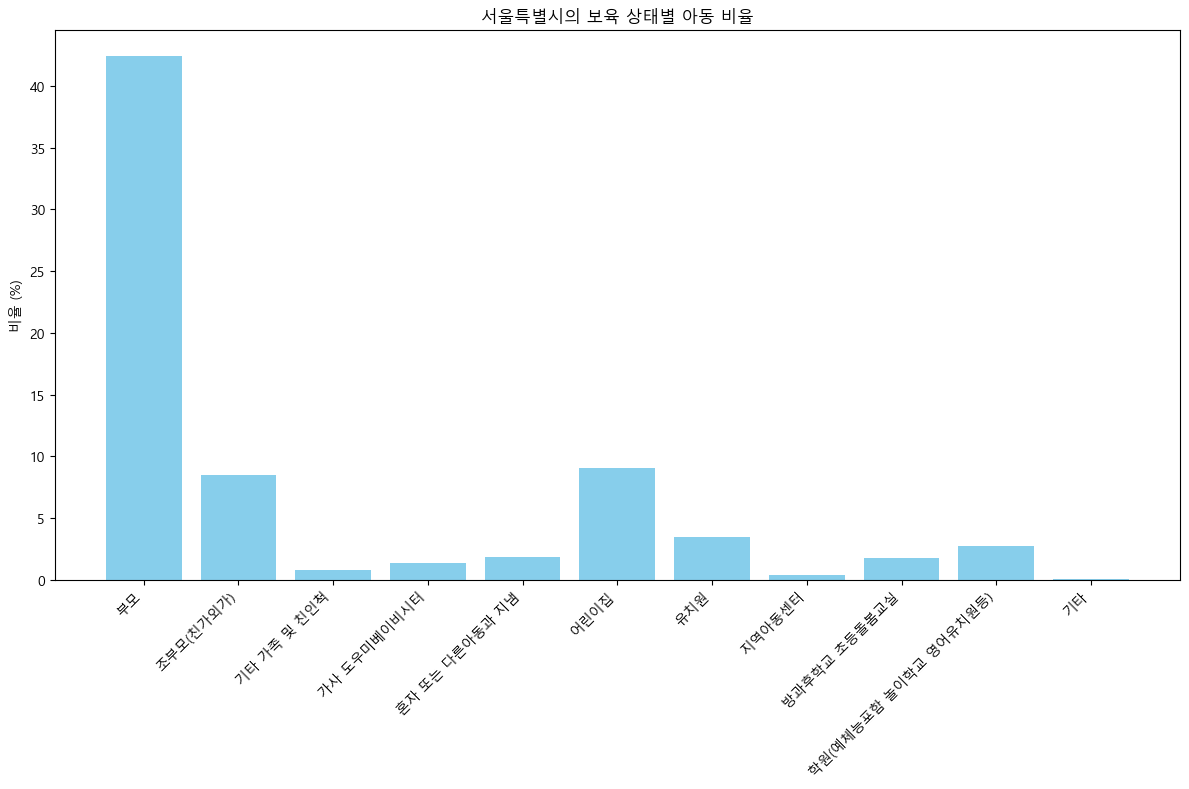

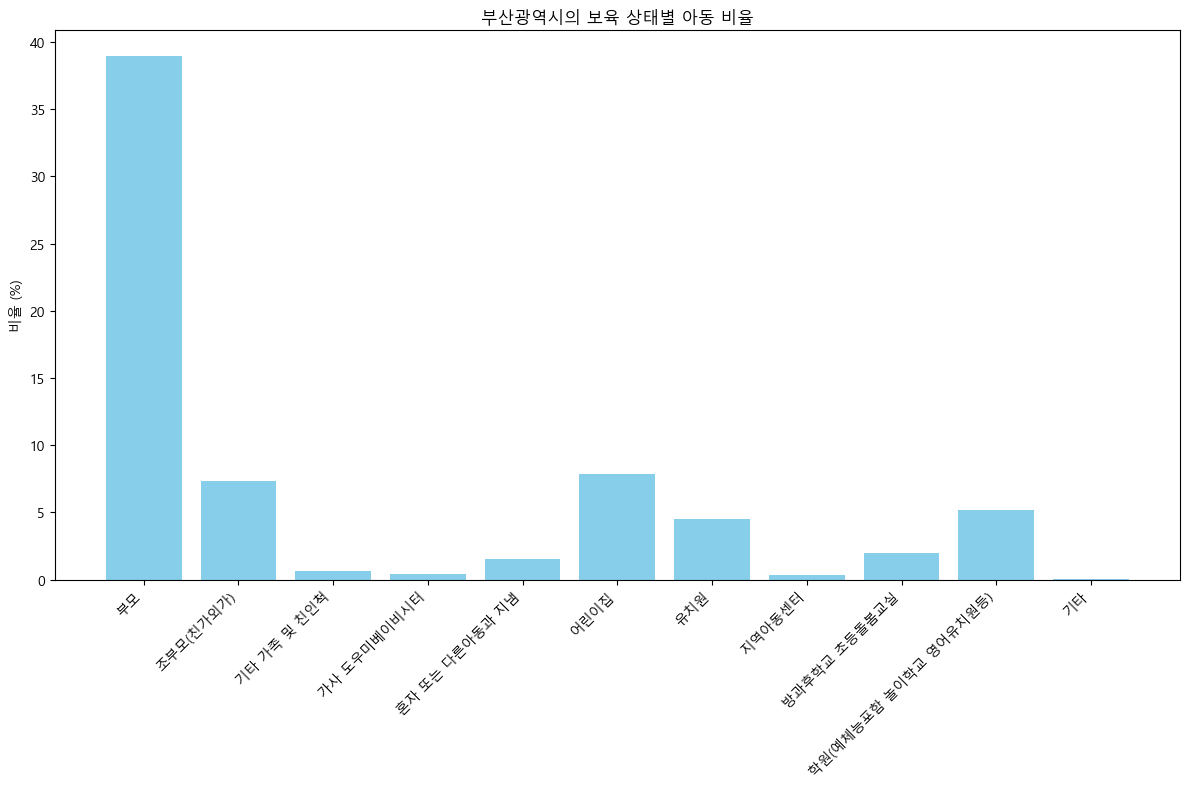

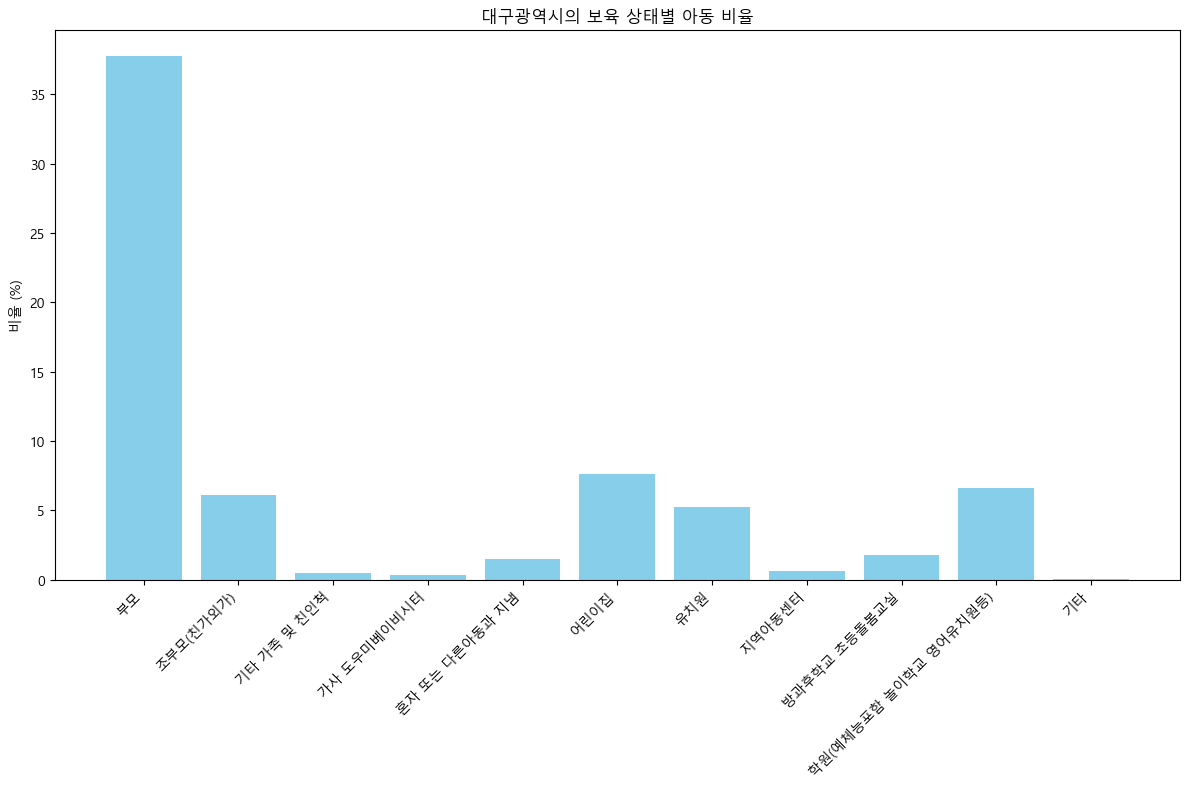

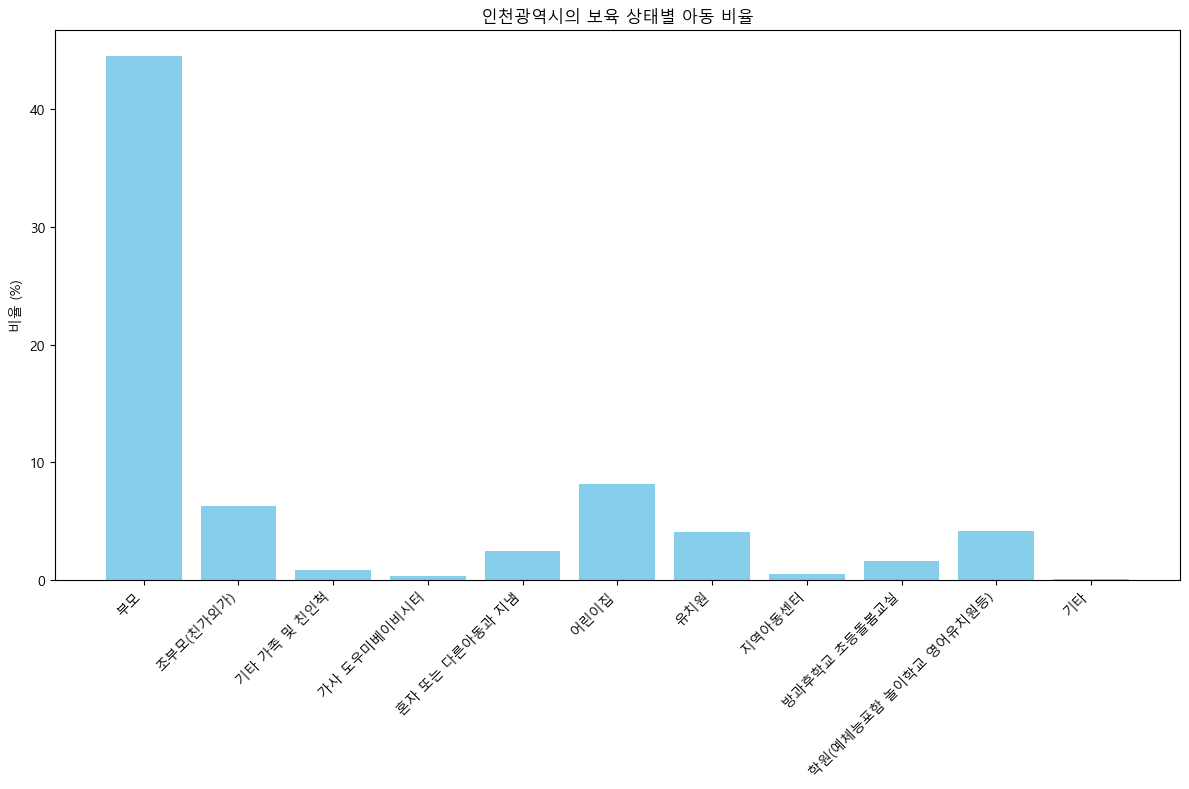

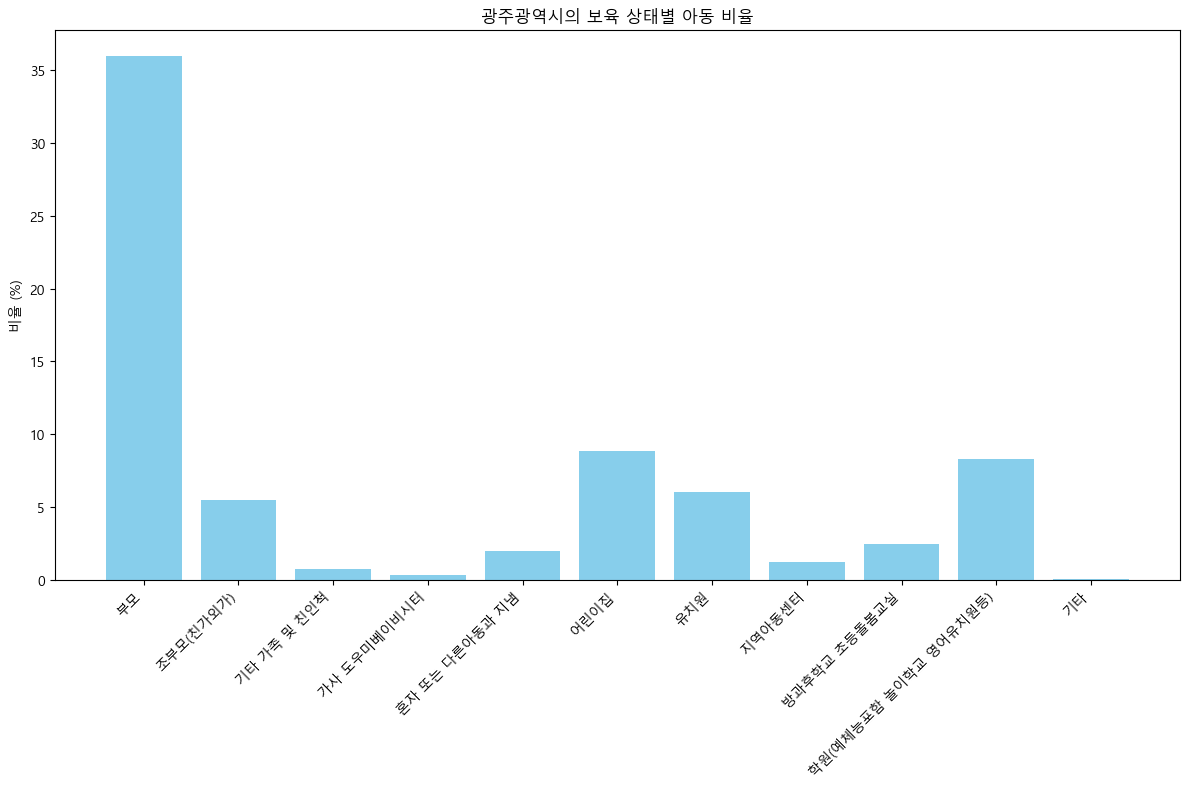

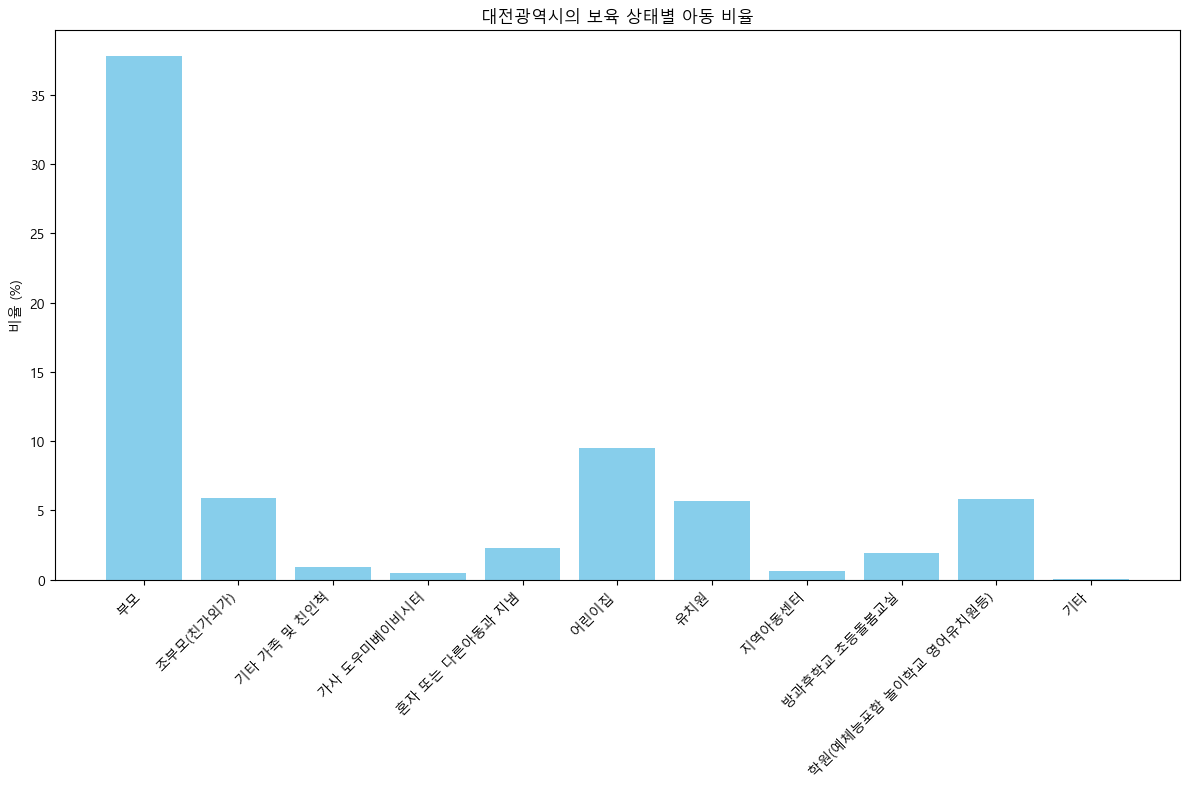

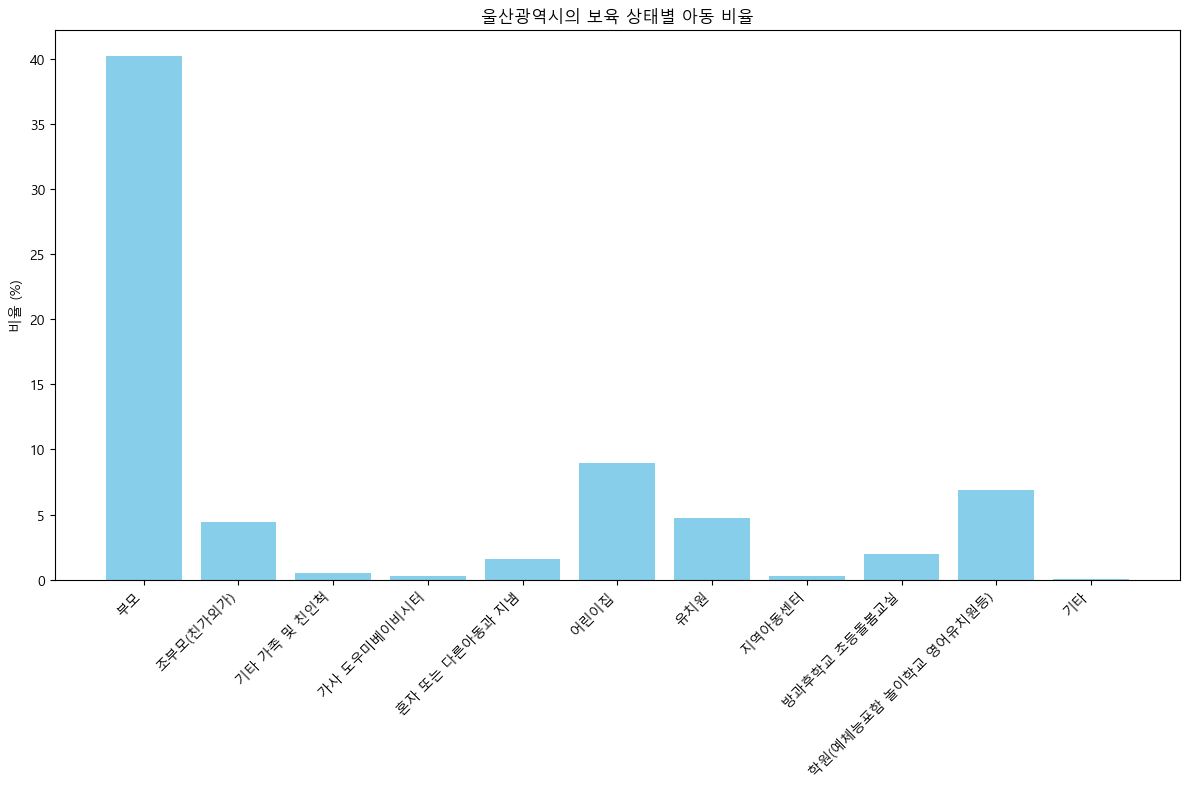

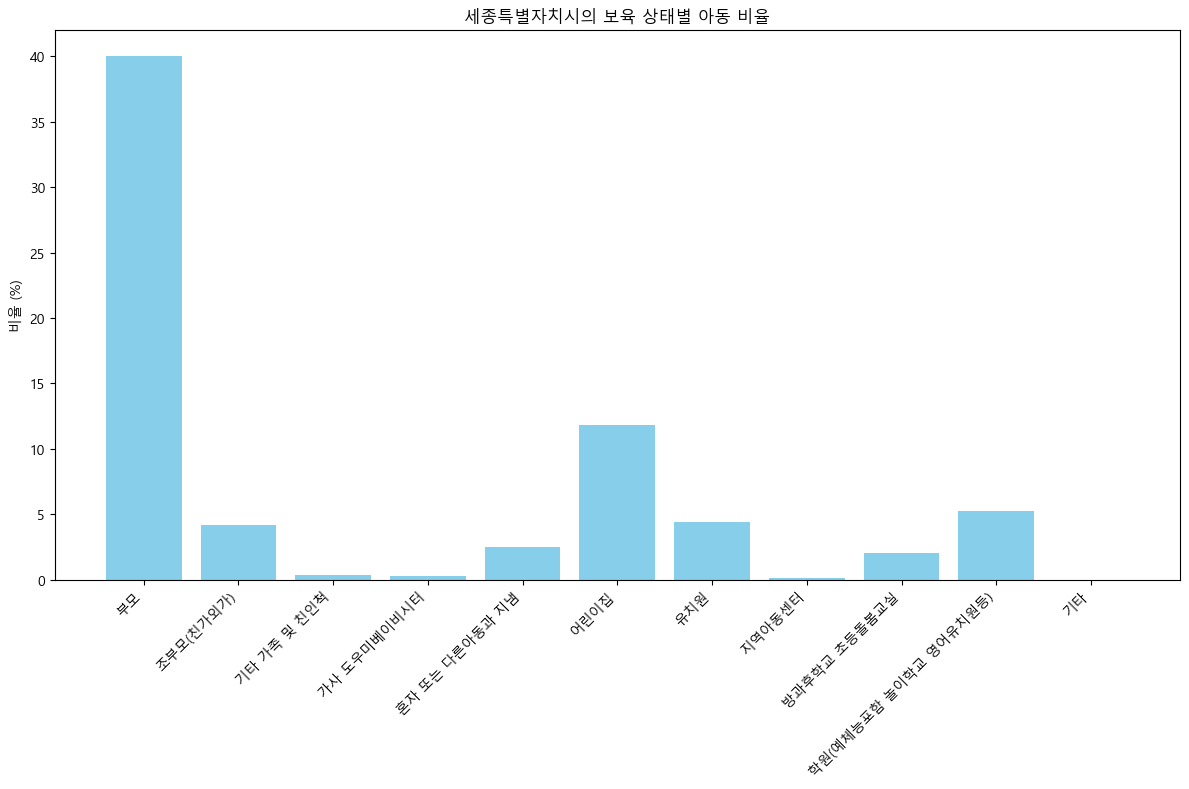

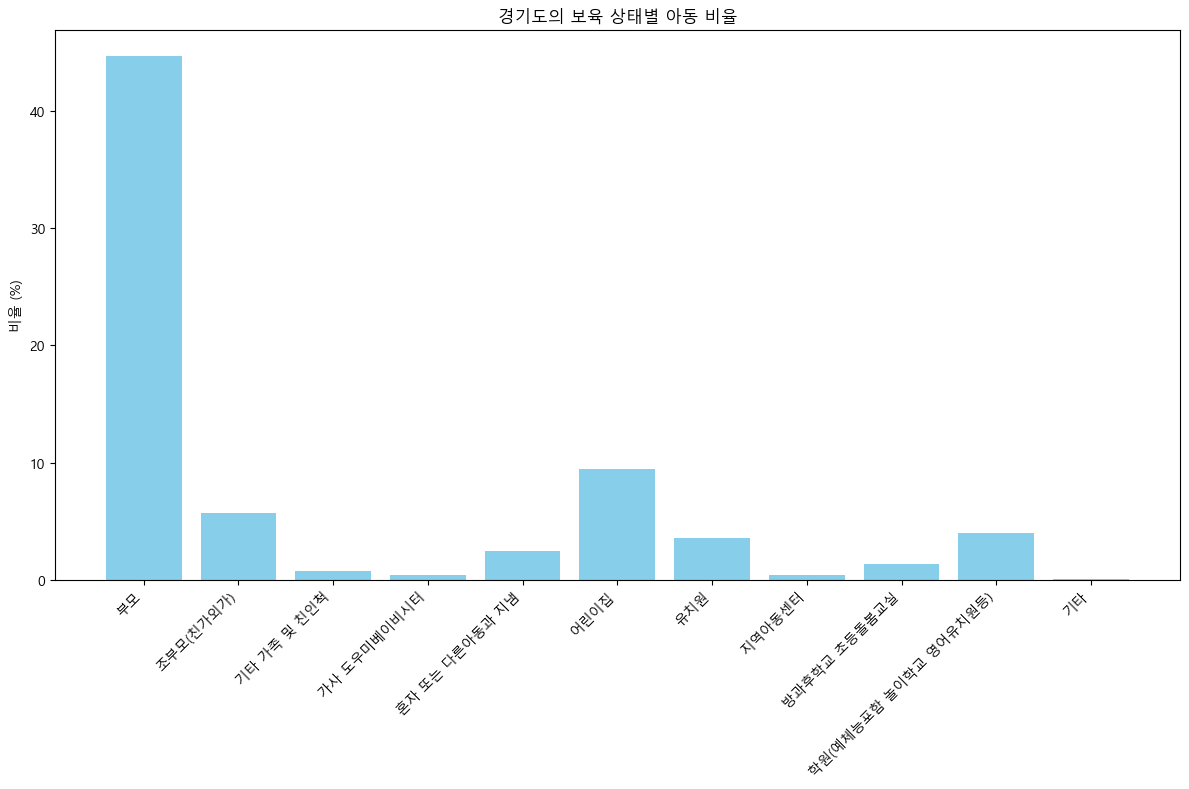

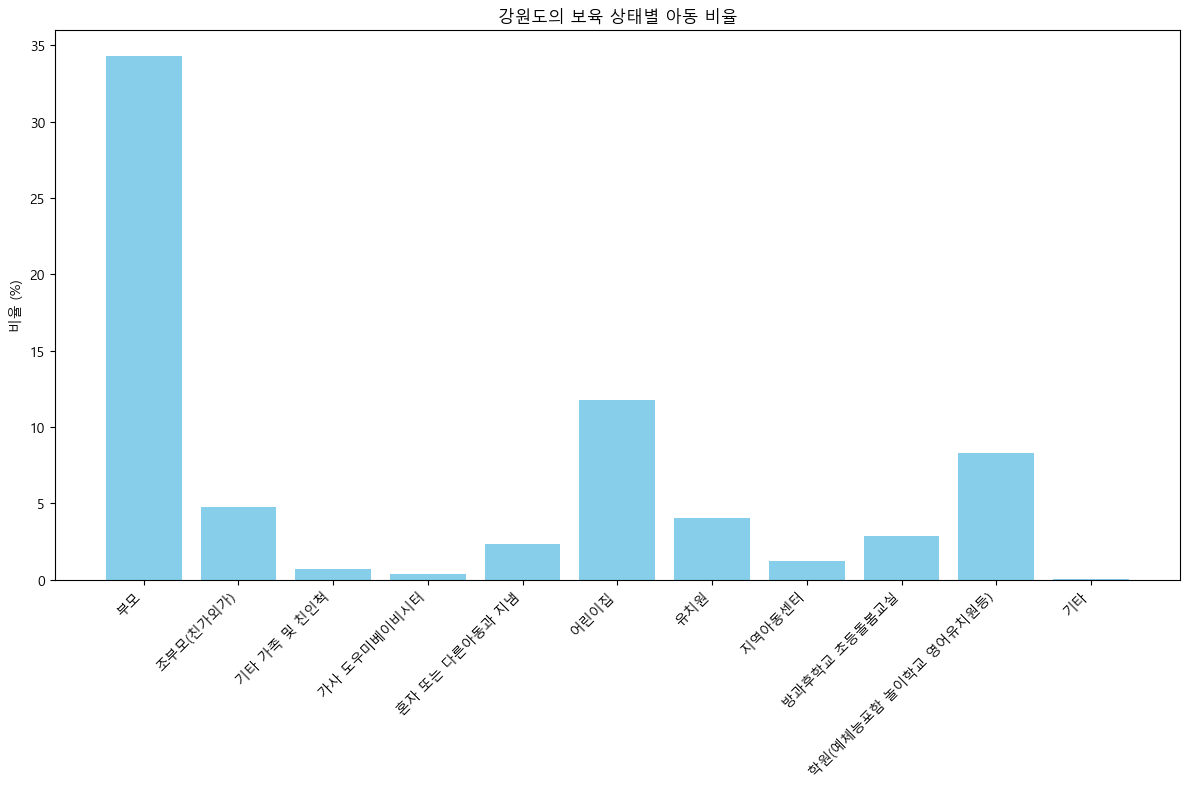

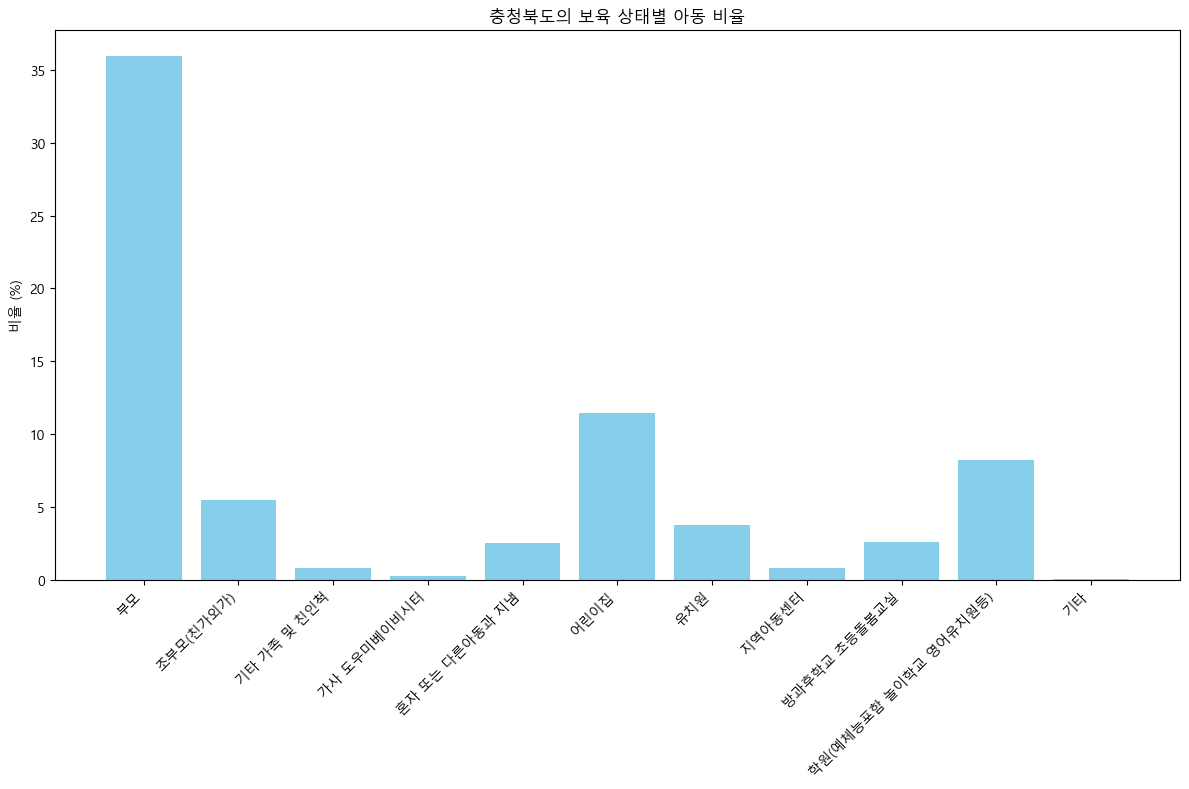

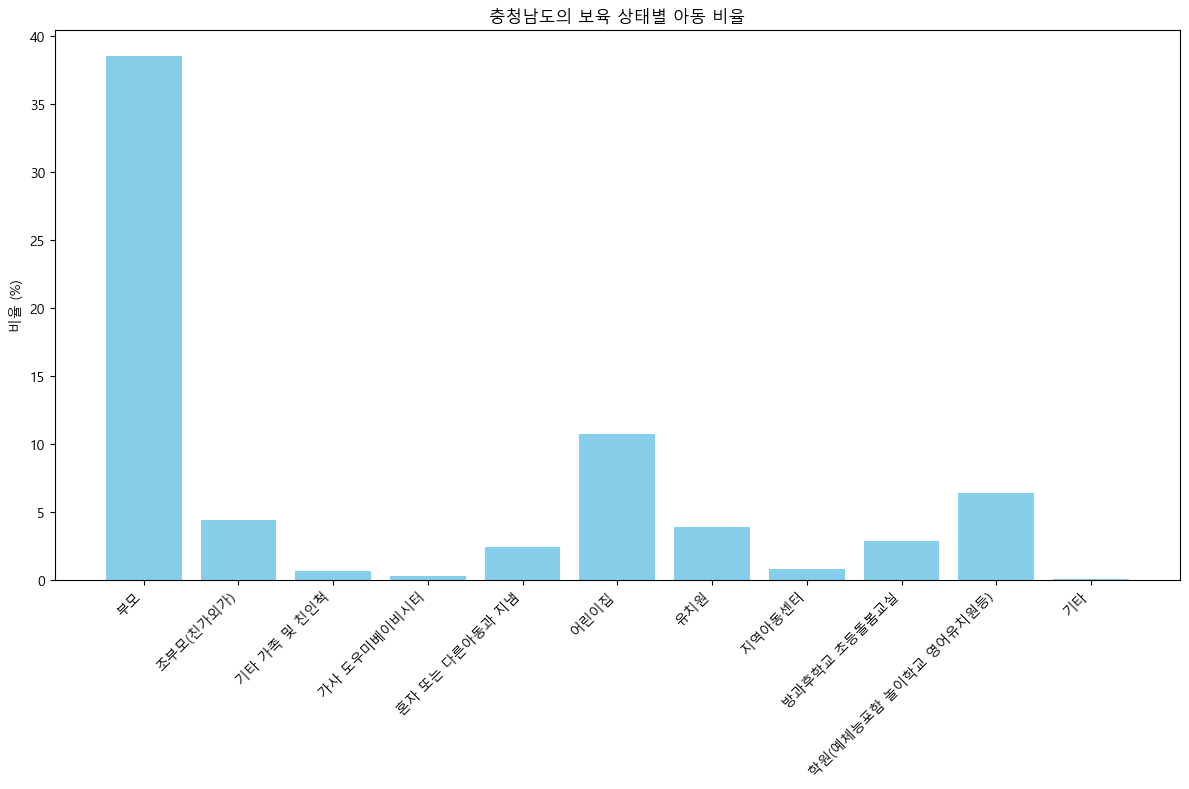

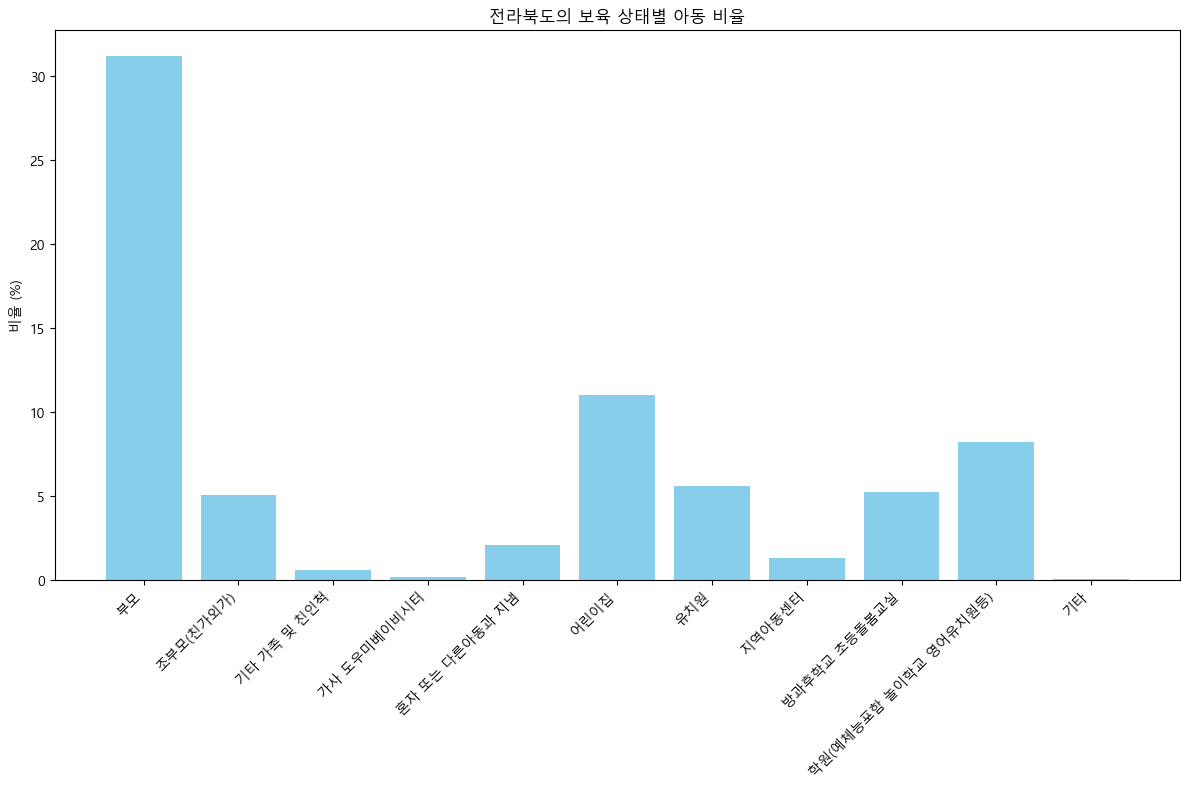

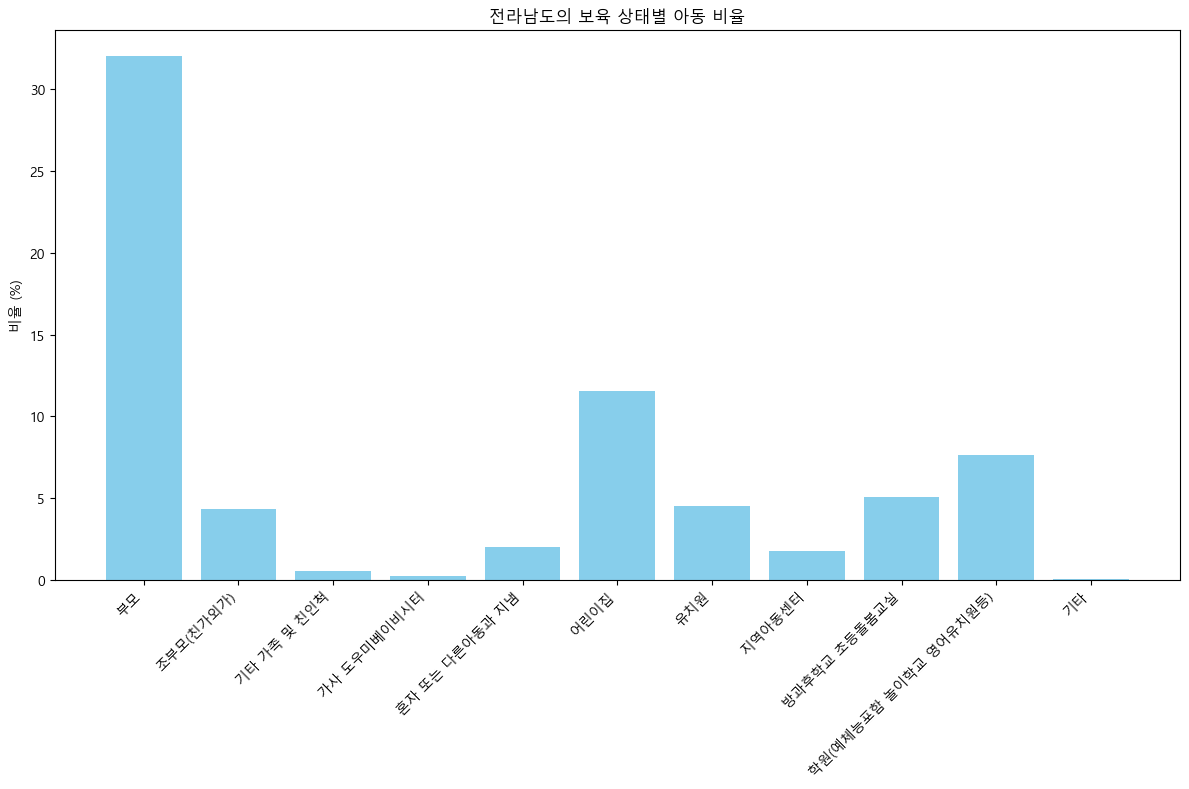

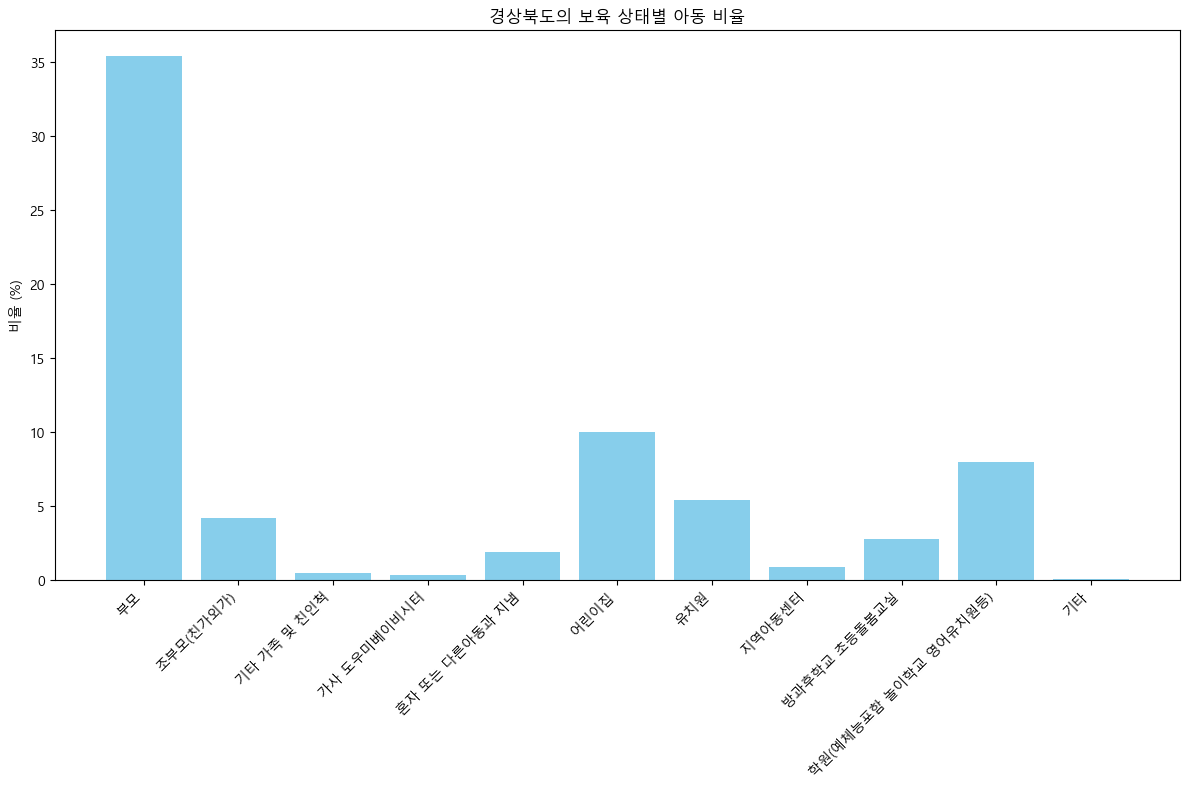

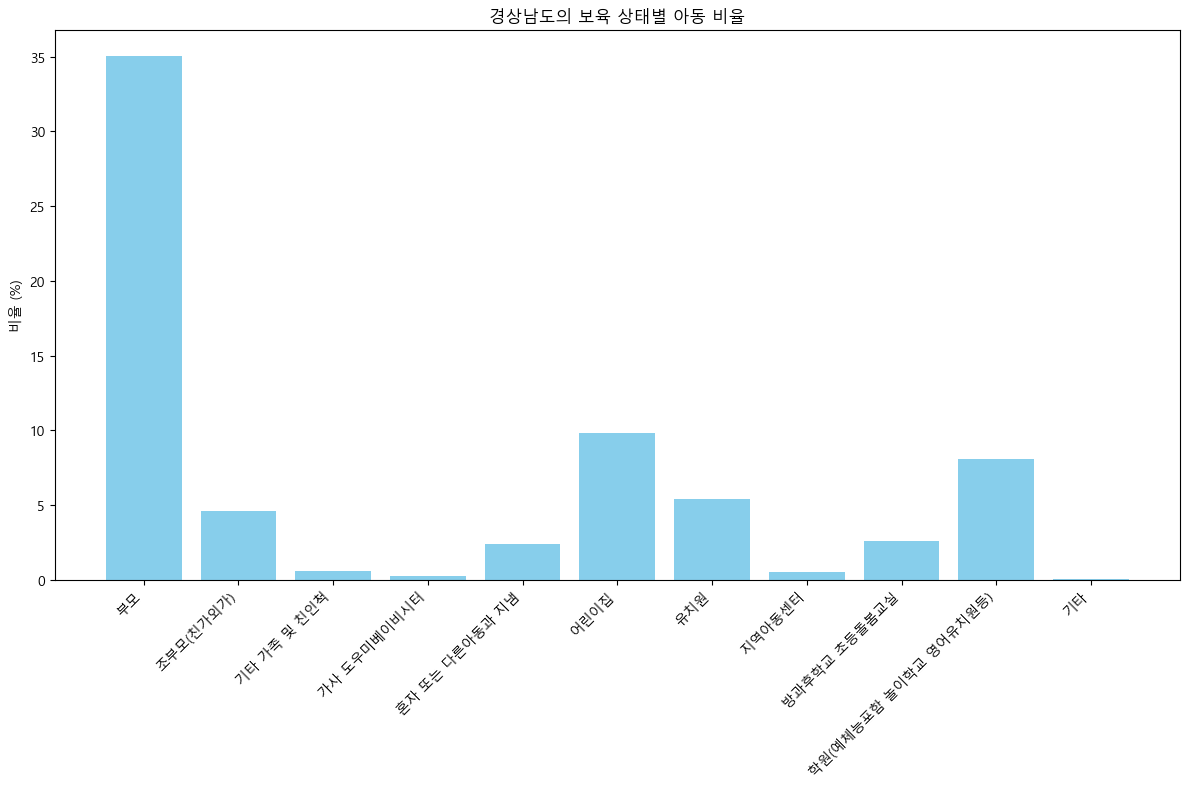

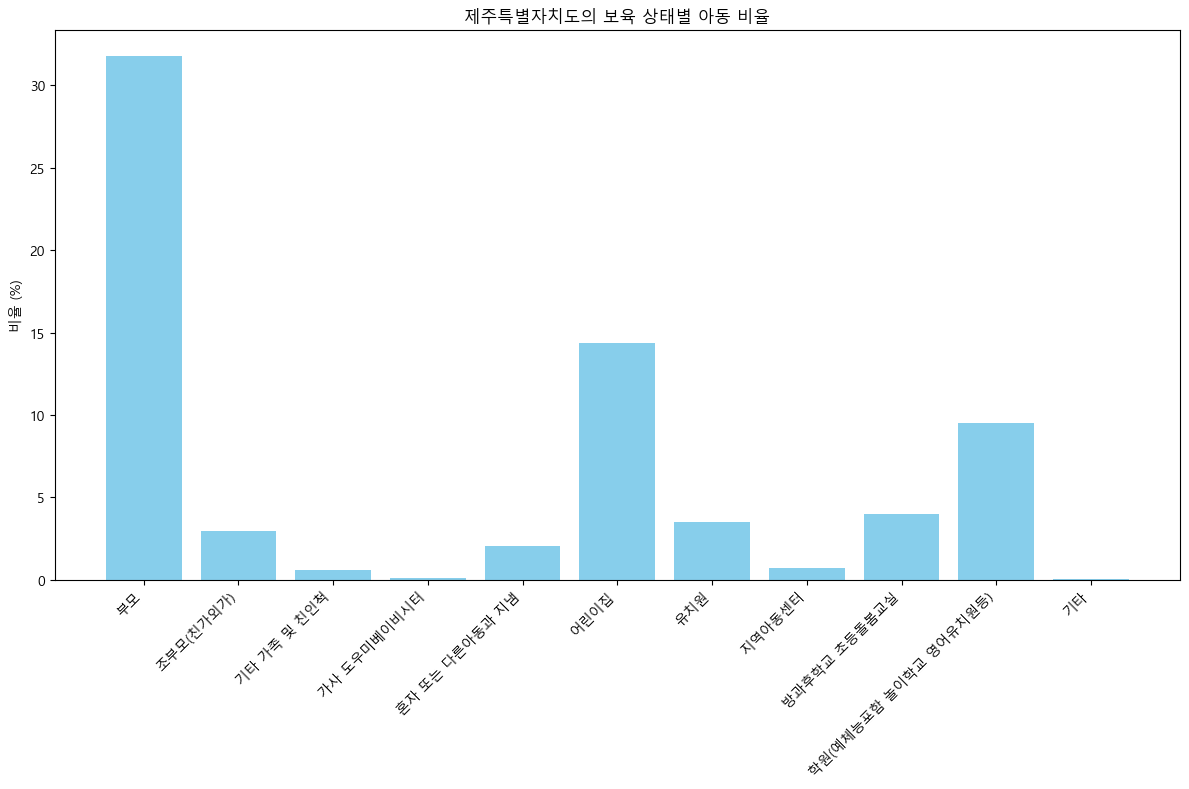

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the columns related to different childcare states to include in the bar chart
childcare_states = [
    '부모', '조부모(친가외가)', '기타 가족 및 친인척', '가사 도우미베이비시터', '혼자 또는 다른아동과 지냄', 
    '어린이집', '유치원', '지역아동센터', '방과후학교 초등돌봄교실', '학원(예체능포함 놀이학교 영어유치원등)', '기타'
]

# Replace '-' with 0 and convert necessary columns to numeric
care_data = care_data.replace('-', 0)
care_data[['아동(12세 이하)-계'] + childcare_states] = care_data[['아동(12세 이하)-계'] + childcare_states].apply(pd.to_numeric)

# Filter data for each unique 행정구역별(시도)
for region in care_data['행정구역별(시도)'].unique():
    # Select data for the current region and "합계" row
    region_data = care_data[(care_data['행정구역별(시도)'] == region) & (care_data['연령별'] == '합계')]
    
    # Check if there is data for the current region
    if not region_data.empty:
        # Calculate the total number of children in the region
        total_children = region_data['아동(12세 이하)-계'].values[0]
        
        # Calculate the percentage for each childcare state
        childcare_percentages = (region_data[childcare_states].values.flatten() / total_children) * 100
        
        # Plotting the bar chart for the current region
        plt.figure(figsize=(12, 8))
        plt.bar(childcare_states, childcare_percentages, color='skyblue')
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("비율 (%)")
        plt.title(f"{region}의 보육 상태별 아동 비율")
        plt.tight_layout()
        plt.show()


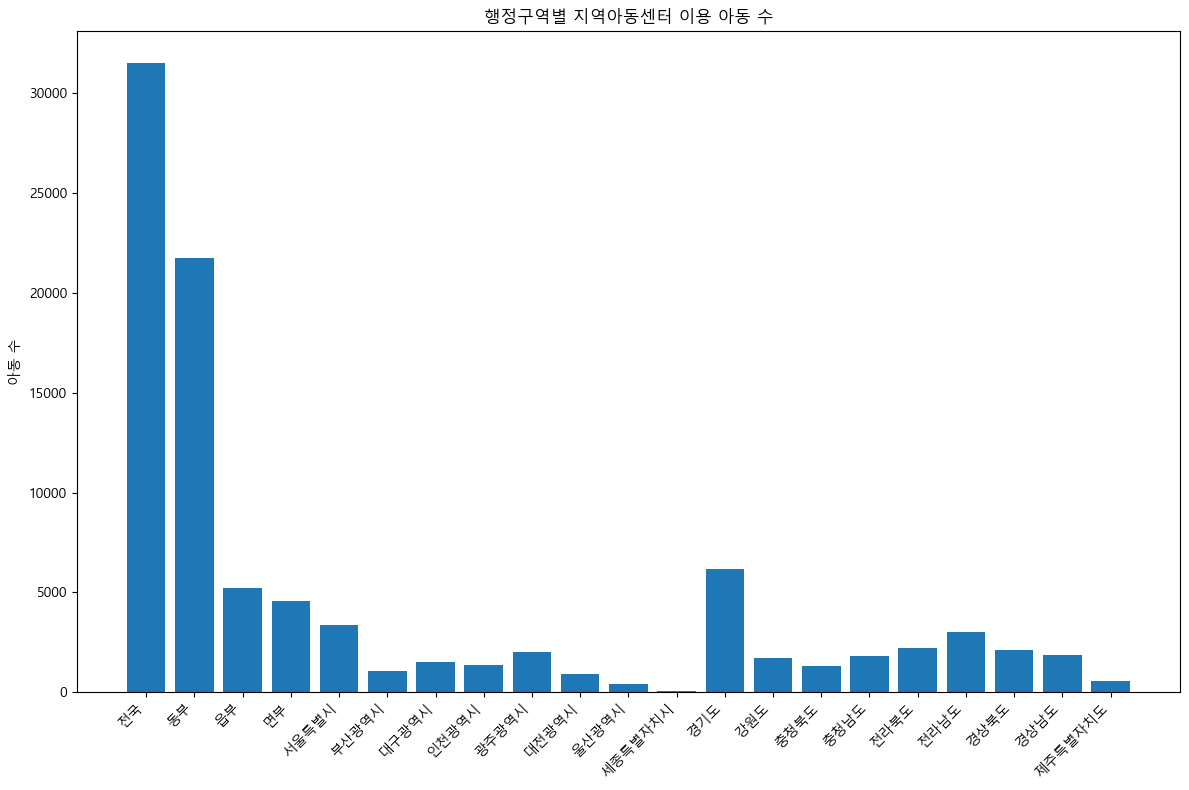

In [6]:
import matplotlib.pyplot as plt

# Filter data for each unique 행정구역별(시도) and focus only on '지역아동센터' column
regions = care_data['행정구역별(시도)'].unique()
region_names = []
region_values = []

for region in regions:
    # Select data for the current region and "합계" row
    region_data = care_data[(care_data['행정구역별(시도)'] == region) & (care_data['연령별'] == '합계')]
    
    # Extract the value for '지역아동센터' for the current region
    if not region_data.empty:
        region_names.append(region)
        region_values.append(int(region_data['지역아동센터'].values[0]))

# Plotting the bar chart for '지역아동센터' across different regions
plt.figure(figsize=(12, 8))
plt.bar(region_names, region_values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("아동 수")
plt.title("행정구역별 지역아동센터 이용 아동 수")
plt.tight_layout()
plt.show()
